In [43]:
from modules.settings import mmf_settings as mmfset
from modules.flat_sky_codes import tangent_plane_analysis as tpa
from astropy.io import fits
import healpy as h
import os
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
def ensure_dir(file_path):
	directory = os.path.dirname(file_path)
	if not os.path.exists(directory):
		os.makedirs(directory)

In [176]:
outpath=mmfset.paths["tplanes"] + "/testing/"
ensure_dir(outpath)

In [201]:
nsideout=8

In [210]:
glon,glat=h.pix2ang(nsideout,arange(h.nside2npix(nsideout)),lonlat=True)

<IPython.core.display.Javascript object>


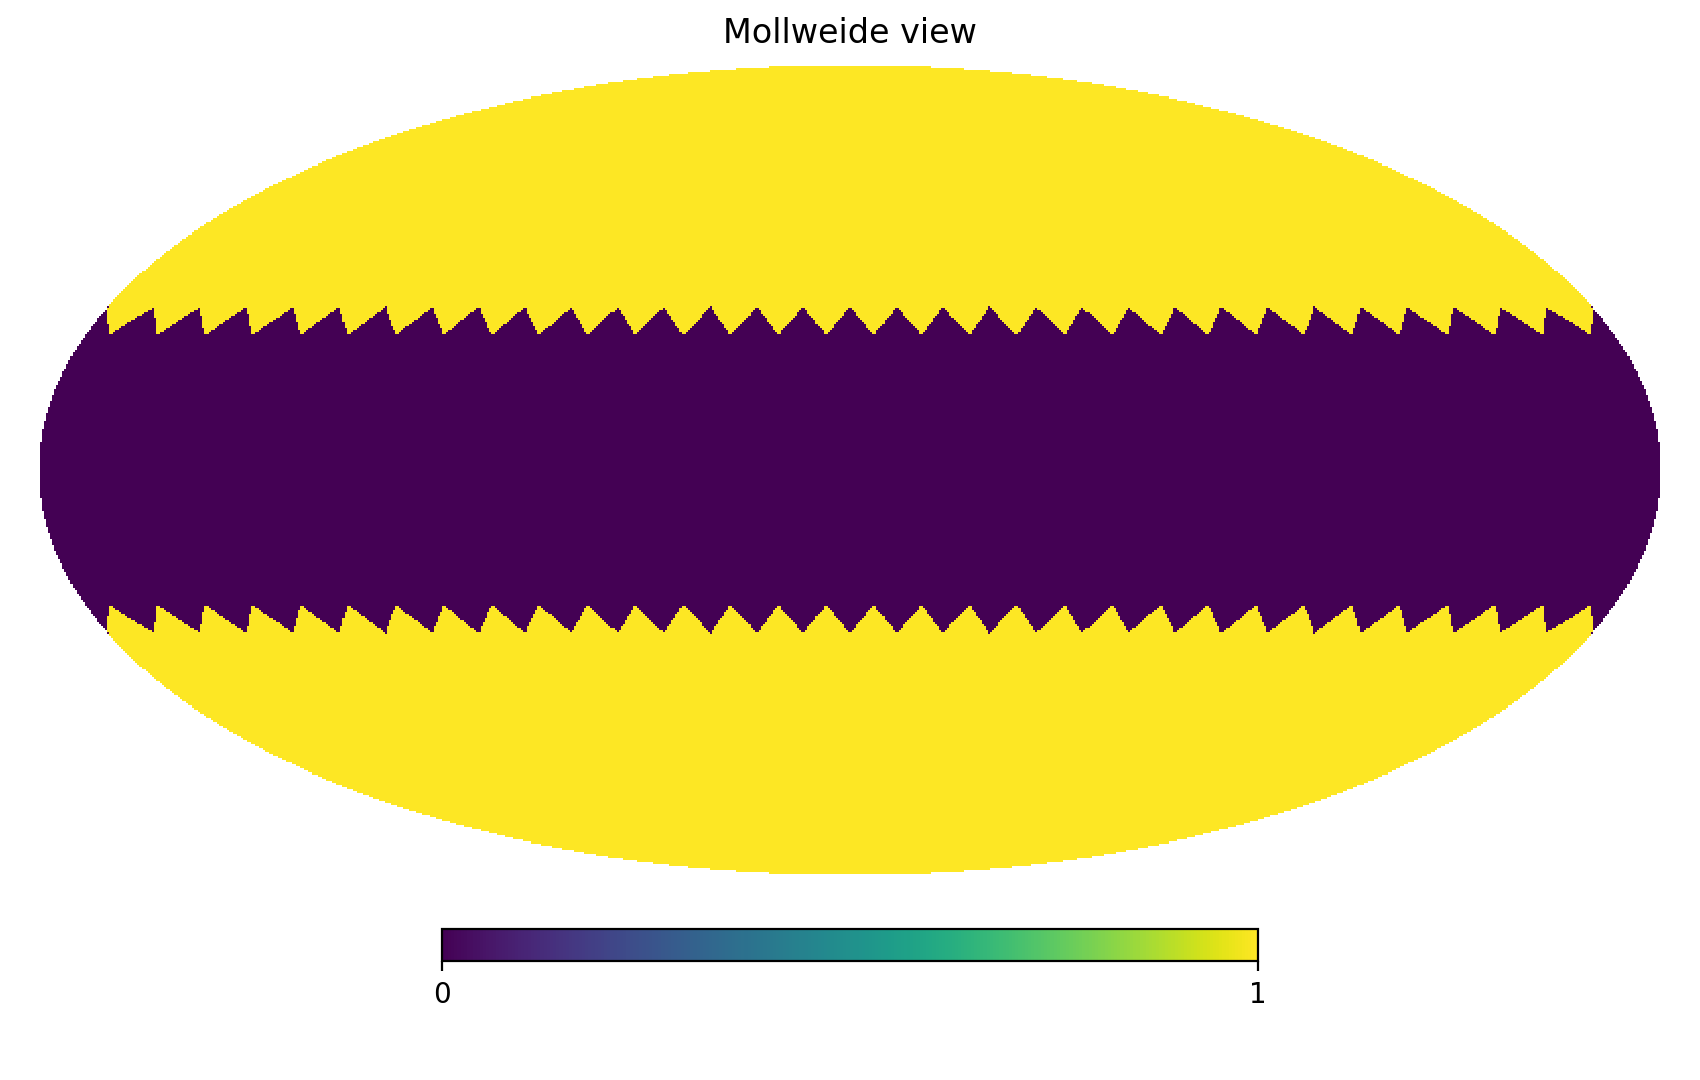

In [222]:
bandmask=np.zeros(np.size(glat),float)
bandmask[abs(glat)>30.]=1.
h.mollview(bandmask)
pixels=np.where(bandmask==1.)[0]

In [233]:
random_pixels=np.random.choice(pixels,100)

<IPython.core.display.Javascript object>


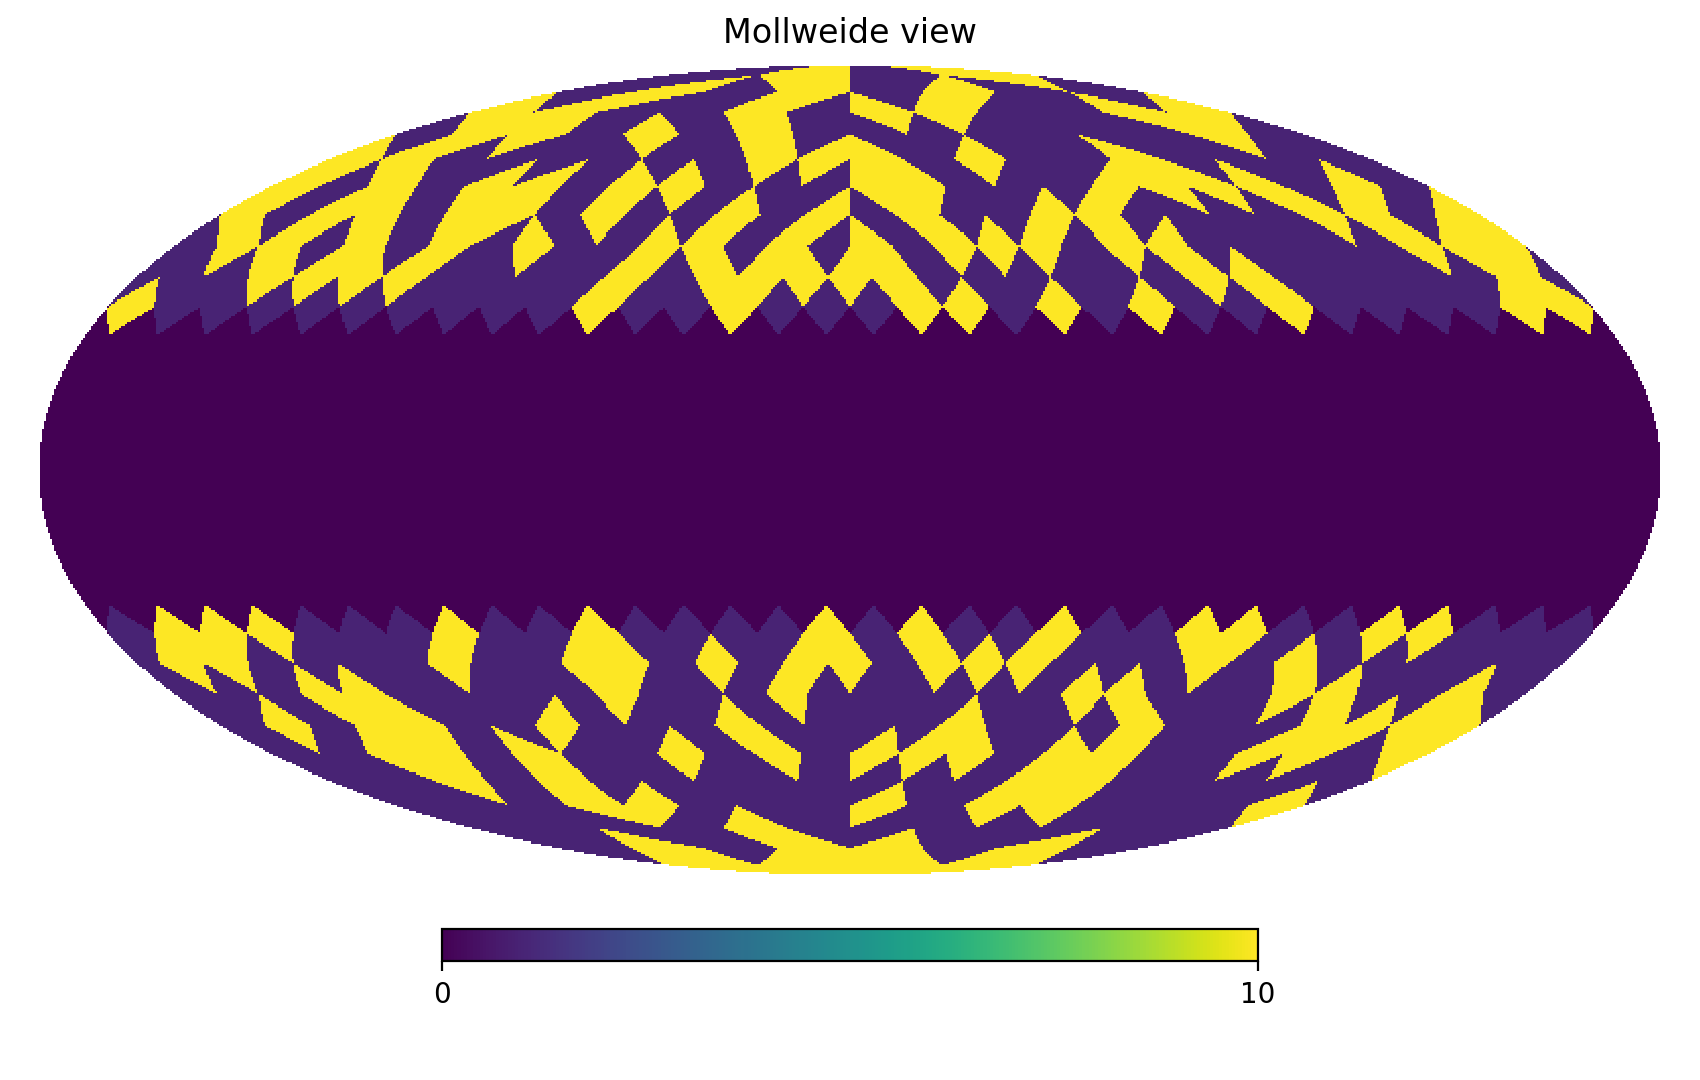

In [234]:
bandmask[random_pixels]=10
h.mollview(bandmask)

In [183]:
for ich, ch in enumerate(mmfset.channels):
    chmap=h.read_map(mmfset.map_fnames[ch],0,verbose=False) #/mmfset.conv_KCMB2MJY[ch]
    for ipix in pixels:
        filename=outpath + "pixel_" + str(ipix) + ".fits"
        projop=tpa.tangent_plane_setup(mmfset.nside,mmfset.xsize,glat[ipix],glon[ipix],rescale=1.)
        timage=projop.get_tangent_plane(chmap)
        
        if os.path.isfile(filename):
            f=fits.open(filename)
            f[2].data[ich,:,:]=timage
            fits.update(filename,f[2].data,f[2].header,"Data tangent plane")
        else:
            print ipix,"Creating file"
            hdu0=fits.PrimaryHDU()
            hdu_ch = fits.ImageHDU()
            hdu_ch.header["EXTNAME"]="Channels"
            hdu_ch.data=mmfset.channels
            hdu_map = fits.ImageHDU()
            hdu_map.header["EXTNAME"]="Data tangent plane"
            hdu_map.header["XYsize"]=str(mmfset.xsize) + " degrees"
            hdu_map.header["Reso"]=str(mmfset.reso) + " arcminutes"
            hdu_map.header["GLON"]=str(round(glon[ipix],4)) + " degrees"
            hdu_map.header["GLAT"]=str(round(glat[ipix],4)) + " degrees"
            null_data=np.zeros((np.size(mmfset.channels),mmfset.npix,mmfset.npix),float)
            null_data[ich,:,:]=timage
            hdu_map.data=null_data
            hdu=fits.HDUList([hdu0,hdu_ch,hdu_map])
            hdu.writeto(filename)

0 Creating file
1 Creating file
2 Creating file
3 Creating file
4 Creating file
5 Creating file
6 Creating file
7 Creating file
8 Creating file
9 Creating file
10 Creating file
11 Creating file


In [193]:
psfilename=mmfset.paths["planck_masks"] + "mmf3_ps_mask.fits"
mask=h.read_map(psfilename,verbose=False)

In [196]:
for ipix in pixels:
    filename=outpath + "pixel_" + str(ipix) + ".fits"
    projop=tpa.tangent_plane_setup(mmfset.nside,mmfset.xsize,glat[ipix],glon[ipix],rescale=1.)
    timage=projop.get_tangent_plane(mask)

    hdu_mask = fits.ImageHDU()
    hdu_mask.header["EXTNAME"]="PS mask"
    hdu_mask.data=timage
    
    fits.append(filename,data=hdu_mask.data,header=hdu_mask.header)
    
    #f=fits.open(filename)
    #f[2].data[ich,:,:]=timage
    #fits.update(filename,f[2].data,f[2].header,"Data tangent plane")

In [197]:
f=fits.open(filename)

In [1]:
from modules.settings import mmf_settings as mmfset

In [2]:
mmfset.paths

{'pico_maps': '/global/cscratch1/sd/raditya/PICO/CMB_PROBE_2017/',
 'reduced_pico_maps': '/global/cscratch1/sd/raditya/PICO/reduced_data/',
 'result_data': '../results/pico_sims/10deg_patches/data/',
 'result_figs': '../results/pico_sims/10deg_patches/figs/',
 'templates': '../data/template_bank/10deg_patches/',
 'tplanes': '../data/tangent_planes/pico_sims/10deg_patches/'}

In [3]:
for key in mmfset.paths.keys():
    print key
    print mmfset.paths[key]

templates
../data/template_bank/10deg_patches/
pico_maps
/global/cscratch1/sd/raditya/PICO/CMB_PROBE_2017/
reduced_pico_maps
/global/cscratch1/sd/raditya/PICO/reduced_data/
tplanes
../data/tangent_planes/pico_sims/10deg_patches/
result_figs
../results/pico_sims/10deg_patches/figs/
result_data
../results/pico_sims/10deg_patches/data/


In [4]:
mmfset.init()

templates
pico_maps


OSError: [Errno 13] Permission denied: '/global'